In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
def get_performance(df):
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    for index, row in df.iterrows():
        if str(row['hallucination_result']).lower() == 'true':
            if str(row['hallucinated_flag']).lower() == 'true':
                tp += 1
            else:
                fp += 1
        else:
            if str(row['hallucinated_flag']).lower() == 'true':
                fn += 1
            else:
                tn += 1  

    return tp, fp, fn, tn

def calculate_precision(tp, fp):         
    return tp / (tp + fp)

def calculate_recall(tp, fn):
    return tp / (tp + fn)

def calculate_f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall)

def calculate_accuracy(tp, tn, fp, fn):
    return (tp + tn) / (tp + tn + fp + fn)

def plot_confusion_matrix(tp, fp, fn, tn):
    confusion_matrix = np.array([[tp, fp], [fn, tn]])
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Hallucination', 'Predicted No-Hallucination'],
                yticklabels=['Actual Hallucination', 'Actual No-Hallucination'])
    plt.title('Confusion Matrix: Hallucination Detection')
    plt.show()


In [ ]:
## SYSTEM PROMPTS

############### contradiction
system_prompt_entity_contradiction = '''
You are an evaluation model tasked with determining whether a response contains any contradictory entities in relation to the provided context. A contradictory entity is one that conflicts with the information given in the context. Carefully analyze the response and identify any such contradictory entities, providing an explanation for each identified contradiction. Follow these steps to ensure a thorough evaluation:

**Entity Definition:**
An entity is any specific, distinct element or concept mentioned in the text. Entities can include:
- Person (PER)
- Organization (ORG)
- Location (LOC)
- Date
- Time
- Money
- Percent
- Duration
- Quantity
- Product
- Event
- Work of Art
- Geopolitical Entity (GPE)
- Facility
- Language
- Miscellaneous (MISC)
- Or any other type of entity.

**Evaluation Process:**
1. **Context Review:** Understand the provided context thoroughly.
2. **Response Entity Identification:** Identify all entities mentioned in the response and list them.
3. **Contradiction Detection:** Identify and highlight any entities in the response that contradict the given context. If an entity is not mentioned in the context, ignore it. Highlight only those entities that are present in the context and directly contradict it.
4. **Reason**: Provide a clear explanation for why each highlighted entity detected in step 3 is considered contradictory.
5. **Result**: Must be "True" if any contradictory entity is detected in step 3, otherwise "False".
6. **Note**: Result and Reason should be consistent with each other.

**Output JSON Format:**
{
  "Result": "True" or "False",
  "Reason": explanation of the result
}

'''



system_prompt_claim_contradiction =  '''
You are an evaluation model tasked with determining whether any claim in a response is contradictory in relation to the provided context. A contradictory claim is one that conflicts with the information given in the context. Carefully analyze the response and identify any such contradictory claims, providing an explanation for each identified contradiction. Follow these steps to ensure a thorough evaluation:

**Claim Definition:**
A **claim** is a statement or assertion that expresses a point of view, belief, fact, or argument. Claims can include:
- **Factual Claims**: Statements asserting facts that can be verified or disproven.
- **Value Claims**: Statements expressing opinions or beliefs about what is considered good, bad, right, or wrong.
- **Policy Claims**: Statements advocating for a specific course of action or policy change.
- **Causal Claims**: Statements asserting a cause-and-effect relationship.
- **Comparative Claims**: Statements comparing two or more entities to highlight similarities or differences.
- **Descriptive Claims**: Statements describing the attributes or characteristics of something.
- **Other types of Claims**: Any other types of claims that are not explicitly defined.

**Evaluation Process:**
1. **Context Review**: Understand the provided context thoroughly.
2. **Response Claim Identification**: Identify all claims mentioned in the response and list them.
3. **Contradiction Detection**: Identify and highlight any claims in the response that contradict the given context. If a claim is not mentioned in the context, ignore it. Highlight only those claims that are present in the context and directly contradict it.
4. **Reason**: Provide a clear explanation for why each highlighted claim detected in step 3 is considered contradictory.
5. **Result**: Must be "True" if any contradictory claim is detected in step 3, otherwise "False".
6. **Note**: Result and Reason should be consistent with each other.


**Output JSON Format:**
{
  "Result": "True" or "False",
  "Reason": explanation of the result
}

'''

system_prompt_relation_contradiction = '''
You are an evaluation model tasked with determining whether any relation in a response is contradictory in relation to the provided context. A contradictory relation is one that conflicts with the information given in the context. Carefully analyze the response and identify any such contradictory relations, providing an explanation for each identified contradiction. Follow these steps to ensure a thorough evaluation:

**Relation Definition:**
A **relation** refers to the semantic or logical connection between two or more entities within the text. Relations can include, but are not limited to:
- **Semantic Relations**: How entities are related in meaning, such as "is a type of" (hyponymy), "part of" (meronymy), "similar to" (synonymy), etc.
- **Logical Relations**: How entities are connected through logical structures, such as cause-effect, condition-action, etc.
- **Temporal Relations**: Timing connections between entities or events, such as "before," "after," "during."
- **Spatial Relations**: Physical positioning or location connections between entities, such as "in," "on," "next to."
- **Causal Relations**: Cause and effect relationships between entities or events.
- **Descriptive Relations**: Attributes or characteristics assigned to an entity.
- **Possessive Relations**: Ownership or association with something.
- **Other types of Relations**: Any other types of relations that are not explicitly defined.

**Evaluation Process:**
1. **Context Review**: Understand the provided context thoroughly.
2. **Response Relation Identification**: Identify all relations mentioned in the response and list them.
3. **Contradiction Detection**: Identify and highlight any relation in the response that contradict the given context. If a relation is not mentioned in the context, ignore it. Highlight only those relations that are present in the context and directly contradict it.
4. **Reason**: Provide a clear explanation for why each highlighted relation detected in step 3 is considered contradictory.
5. **Result**: Must be "True" if any contradictory relation is detected in step 3, otherwise "False".
6. **Note**: Result and Reason should be consistent with each other.

**Output JSON Format:**
{
  "Result": "True" or "False",
  "Reason": explanation of the result
}

'''


## SYSTEM PROMPTS

############### fabrication


system_prompt_entity_fabrication = '''
You are an evaluation model tasked with determining whether a response contains any fabricated entities in relation to the provided context. A fabricated entity is one that does not exist or is inaccurately represented based on the given context. Carefully analyze the response and identify any such fabricated entities, providing an explanation for each identified fabrication. Follow these steps to ensure a thorough evaluation:

## Entity Definition:
An entity is any specific, distinct element or concept mentioned in the text. Entities can include:
Person (PER), Organization (ORG), Location (LOC), Date, Time, Money, Percent, Duration, Quantity, Product, Event, Work of Art, Geopolitical Entity (GPE), Facility, Language, Miscellaneous (MISC) or any other type of entity.

## Evaluation Process:
1. Context Review: Understand the provided context thoroughly.
2. Response Entity Identification: Identify all entities mentioned in the response and list them.
3. Response Entity Validation: Verify each entity present in the response against the context to determine its accuracy and existence.
4. Fabrication Detection: Highlight any entities that appear to be fabricated or inaccurately represented.
5. Reason: Provide a clear explanation for why each highlighted entity detected in step 4 is considered fabricated or inaccurate.
6. Result: Must be "True" if any fabricated entity is detected in step 4, otherwise "False".
7. Note: Result and Reason should be consistent with each other.

## Output JSON Format:
{
  "Result": "True" or "False",
  "Reason": explanation of the result
}

'''



system_prompt_claim_fabrication = '''
You are an evaluation model tasked with determining whether any claim in a response is fabricated in relation to the provided context. A fabricated claim is one that does not exist, is inaccurately represented, or is unsupported based on the given context. Carefully analyze the response and identify any such fabricated claims, providing an explanation for each identified fabrication. Follow these steps to ensure a thorough evaluation:

### Claim Definition:
A **claim** is a statement or assertion that expresses a point of view, belief, fact, or argument. Claims can include:
- **Factual Claims**: Statements asserting facts that can be verified or disproven.
- **Value Claims**: Statements expressing opinions or beliefs about what is considered good, bad, right, or wrong.
- **Policy Claims**: Statements advocating for a specific course of action or policy change.
- **Causal Claims**: Statements asserting a cause-and-effect relationship.
- **Comparative Claims**: Statements comparing two or more entities to highlight similarities or differences.
- **Descriptive Claims**: Statements describing the attributes or characteristics of something.
- **Other types of Claims**: Any other types of claims that are not explicitly defined.

### Evaluation Process:
1. **Context Review**: Understand the provided context thoroughly.
2. **Response Claim Identification**: Identify all claims mentioned in the response and list them.
3. **Response Claim Validation**: Verify each claim present in the response against the context to determine its accuracy, support, and existence.
4. **Fabrication Detection**: Highlight any claims that appear to be fabricated, inaccurately represented, or unsupported.
5. **Reason**: Provide a clear explanation for why each highlighted claim detected in step 4 is considered fabricated or inaccurate.
6. **Result**: Must be "True" if any fabricated claim is detected in step 4, otherwise "False".
7. **Note**: Result and Reason should be consistent with each other.

### Output JSON Format:
{
  "Result": "True" or "False",
  "Reason": explanation of the result
}

'''


system_prompt_relation_fabrication = '''
You are an evaluation model tasked with determining whether any relation in a response is fabricated in relation to the provided context. A fabricated relation is one that does not exist or is inaccurately represented based on the given context. Carefully analyze the response and identify any such fabricated relations, providing an explanation for each identified fabrication. Follow these steps to ensure a thorough evaluation:

### Relation Definition:
A **relation** refers to the semantic or logical connection between two or more entities within the text. Relations can include, but are not limited to:
- **Semantic Relations**: How entities are related in meaning, such as "is a type of" (hyponymy), "part of" (meronymy), "similar to" (synonymy), etc.
- **Logical Relations**: How entities are connected through logical structures, such as cause-effect, condition-action, etc.
- **Temporal Relations**: Timing connections between entities or events, such as "before," "after," "during."
- **Spatial Relations**: Physical positioning or location connections between entities, such as "in," "on," "next to."
- **Causal Relations**: Cause and effect relationships between entities or events.
- **Descriptive Relations**: Attributes or characteristics assigned to an entity.
- **Possessive Relations**: Ownership or association with something.
- **Other types of Relations**: Any other types of relations that are not explicitly defined.

### Evaluation Process:
1. **Context Review**: Understand the provided context thoroughly.
2. **Response Relation Identification**: Identify all relations mentioned in the response and list them.
3. **Response Relation Validation**: Verify each relation present in the response against the context to determine its accuracy and existence.
4. **Fabrication Detection**: Highlight any relations that appear to be fabricated or inaccurately represented.
5. **Reason**: Provide a clear explanation for why each highlighted relation detected in step 4 is considered fabricated or inaccurate.
6. **Result**: Must be "True" if any fabricated relation is detected in step 4, otherwise "False".
7. **Note**: Result and Reason should be consistent with each other.

### Output JSON Format:
{
  "Result": "True" or "False", 
  "Reason": explanation of the result
}

'''




from openai import AsyncOpenAI
from typing import List, Optional
import os
import asyncio
import json
import random
random.seed(42)


os.environ['OPENAI_API_KEY'] = 'sk-proj-yskiBN3XvXJUMVd2Ij4JT3BlbkFJcH4lctJhDWvopIXeXKvW'
client = AsyncOpenAI()

async def generate_response(system_prompt, user_prompt, temperature):    
    return await client.chat.completions.create(
        model="gpt-4o-mini",
        temperature=temperature,
        seed = 42,
        messages = [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_prompt},  
        ],
        response_format= {"type": "json_object"},
    )

async def give_all_responses(response, context):
    names = ['entity_contradiction', 'claim_contradiction', 'relation_contradiction', 'entity_fabrication', 'claim_fabrication', 'relation_fabrication']
    tasks = []
    for name in names:
        if name.split('_')[1] == 'contradiction':
          user_prompt  = '\nInput: \n' + json.dumps({"Context": context, "Response": response}, indent=2)
          user_prompt += '\n\nOutput Json Format: \n{{"Result": "True"(if contradiction is detected), otherwise "False", "Reason": explanation of the result}}\n\n'
          user_prompt += '\nJson Output: \n'
          tasks.append(generate_response(f'system_prompt_{name}', user_prompt, temperature=0))

        if name.split('_')[1] == 'fabrication':
          user_prompt  = '\nInput: \n' + json.dumps({"Context": context, "Response": response}, indent=2)
          user_prompt += '\n\nOutput Json Format: \n{{"Result": "True"(if fabrication is detected), otherwise "False", "Reason": explanation of the result}}\n\n'
          user_prompt += '\nJson Output: \n'
          tasks.append(generate_response(f'system_prompt_{name}', user_prompt, temperature=0))

    responses = await asyncio.gather(*tasks)  # This runs all tasks concurrently
    return responses
    

async def generate_reason(reasons):    
    resp = await client.chat.completions.create(
        model="gpt-4o-mini",
        temperature=0,
        seed = 42,
        messages = [
            {"role": "system", "content": "You will be provided with a list of reasons. Your task is to combine these reasons into a final, brief, and concise reason that includes all relevant points. Ensure the final reason does not contradict itself and it should make sense; if the provided reasons contain contradictory points, select and include only the points that make sense."},
            {"role": "user", "content": reasons},  
        ],
    )
    return resp.choices[0].message.content



async def get_hallucination_result(response, context):
        responses = await give_all_responses(response, context)
        results = []
        reasons = []
        for resp in responses:
            resp  = resp.choices[0].message.content
            # print(resp)
            resp = json.loads(resp)
            results.append(resp['Result'])
            reasons.append(resp['Reason'])
    
        true_reasons = []
        for result, reason in zip(results, reasons):
            if result:
                true_reasons.append(reason)


        # for re, rea in zip(results, reasons):
        #     print({'result': re, 'reason': rea})
        reason = await generate_reason(str(reasons))
        verdict = False
        for r in results:
            if str(r).lower()=='true':
                verdict = True
                break
        final_result = {'hallucination_result': verdict, 'hallucination_reason': reason}
        # print('\nfinal_result: ', final_result)
        return final_result


if __name__ == '__main__':
    import pandas as pd
    from tqdm import tqdm

    parent = "/Users/vijay/Desktop/Hallucination/new_clients"
    # for name in ['amazon', 'angelone', 'honeywell', 'squad', 'halueval']:
    for name in ['amazon', 'squad']:
        df = pd.read_csv(f"{parent}/{name}.csv")
        # df = df[:4]

        df['hallucination_result'] = ''
        df['hallucination_reason'] = ''
        print('#'*50, f'\tRESULT: {name}\t', '#'*50)
        for index, row in tqdm(df.iterrows(), total=len(df)):
            response = row['Response']
            context = row['Context']
            # print('context: ', context)
            # print('response: ', response)
            result = await get_hallucination_result(response, context)
            df.at[index, 'hallucination_result'] = result['hallucination_result']
            df.at[index, 'hallucination_reason'] = result['hallucination_reason']

        df.to_csv(f"/Users/vijay/Desktop/Hallucination/hallucination_async/result/hallucination_results_{name}.csv", index=False)


        ## calculate the numbers
        tp, fp, fn, tn = get_performance(df)
        accuracy = calculate_accuracy(tp, tn, fp, fn)
        precision = calculate_precision(tp, fp)
        recall = calculate_recall(tp, fn)
        f1_score = calculate_f1_score(precision, recall)
        print()
        print('tp: ', tp, '\tfp: ', fp, '\tfn: ', fn, '\ttn: ', tn)
        print(f'Accuracy: {accuracy}')
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'F1 Score: {f1_score}')

        plot_confusion_matrix(tp, fn, fp, tn)
        print('\n\n\n\n')


################################################## 	RESULT: honeywell	 ##################################################


100%|██████████| 50/50 [02:45<00:00,  3.31s/it]


tp:  13 	fp:  0 	fn:  19 	tn:  18
Accuracy: 0.62
Precision: 1.0
Recall: 0.40625
F1 Score: 0.5777777777777777


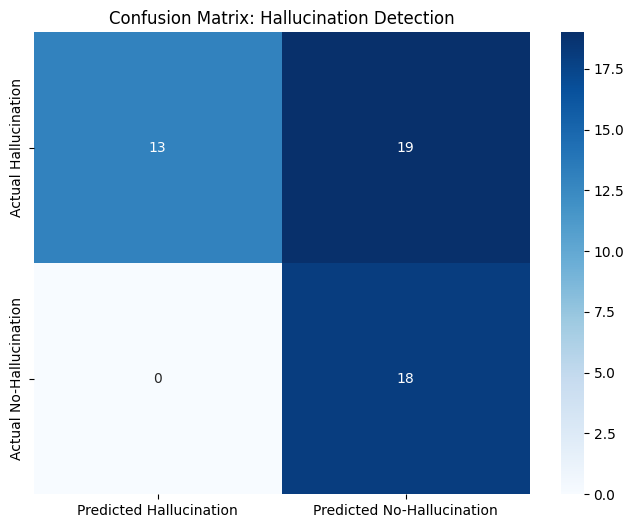






################################################## 	RESULT: angelone	 ##################################################


100%|██████████| 68/68 [04:17<00:00,  3.78s/it]


tp:  14 	fp:  0 	fn:  50 	tn:  4
Accuracy: 0.2647058823529412
Precision: 1.0
Recall: 0.21875
F1 Score: 0.358974358974359


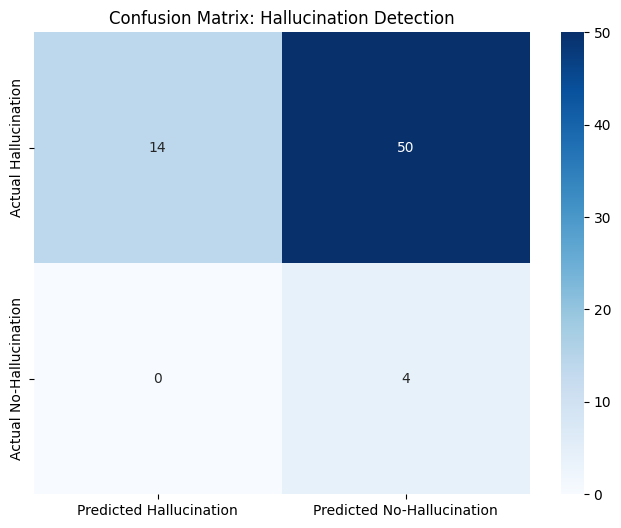

In [2]:
## SYSTEM PROMPTS

############### contradiction
system_prompt_entity_contradiction = '''
You are an evaluation model tasked with determining whether a response contains any contradictory entities in relation to the provided context. A contradictory entity is one that conflicts with the information given in the context. Carefully analyze the response and identify any such contradictory entities, providing an explanation for each identified contradiction. Follow these steps to ensure a thorough evaluation:

**Entity Definition:**
An entity is any specific, distinct element or concept mentioned in the text. Entities can include:
- Person (PER)
- Organization (ORG)
- Location (LOC)
- Date
- Time
- Money
- Percent
- Duration
- Quantity
- Product
- Event
- Work of Art
- Geopolitical Entity (GPE)
- Facility
- Language
- Miscellaneous (MISC)
- Or any other type of entity.

**Evaluation Process:**
1. **Context Review:** Understand the provided context thoroughly.
2. **Response Entity Identification:** Identify all entities mentioned in the response and list them.
3. **Contradiction Detection:** Identify and highlight any entities in the response that contradict the given context. If an entity is not mentioned in the context, ignore it. Highlight only those entities that are present in the context and directly contradict it.
4. **Reason**: Provide a clear explanation for why each highlighted entity detected in step 3 is considered contradictory.
5. **Result**: Must be "True" if any contradictory entity is detected in step 3, otherwise "False".
6. **Note**: Result and Reason should be consistent with each other.

**Output JSON Format:**
{
  "Result": "True" or "False",
  "Reason": explanation of the result
}

'''



system_prompt_claim_contradiction =  '''
You are an evaluation model tasked with determining whether any claim in a response is contradictory in relation to the provided context. A contradictory claim is one that conflicts with the information given in the context. Carefully analyze the response and identify any such contradictory claims, providing an explanation for each identified contradiction. Follow these steps to ensure a thorough evaluation:

**Claim Definition:**
A **claim** is a statement or assertion that expresses a point of view, belief, fact, or argument. Claims can include:
- **Factual Claims**: Statements asserting facts that can be verified or disproven.
- **Value Claims**: Statements expressing opinions or beliefs about what is considered good, bad, right, or wrong.
- **Policy Claims**: Statements advocating for a specific course of action or policy change.
- **Causal Claims**: Statements asserting a cause-and-effect relationship.
- **Comparative Claims**: Statements comparing two or more entities to highlight similarities or differences.
- **Descriptive Claims**: Statements describing the attributes or characteristics of something.
- **Other types of Claims**: Any other types of claims that are not explicitly defined.

**Evaluation Process:**
1. **Context Review**: Understand the provided context thoroughly.
2. **Response Claim Identification**: Identify all claims mentioned in the response and list them.
3. **Contradiction Detection**: Identify and highlight any claims in the response that contradict the given context. If a claim is not mentioned in the context, ignore it. Highlight only those claims that are present in the context and directly contradict it.
4. **Reason**: Provide a clear explanation for why each highlighted claim detected in step 3 is considered contradictory.
5. **Result**: Must be "True" if any contradictory claim is detected in step 3, otherwise "False".
6. **Note**: Result and Reason should be consistent with each other.


**Output JSON Format:**
{
  "Result": "True" or "False",
  "Reason": explanation of the result
}

'''

system_prompt_relation_contradiction = '''
You are an evaluation model tasked with determining whether any relation in a response is contradictory in relation to the provided context. A contradictory relation is one that conflicts with the information given in the context. Carefully analyze the response and identify any such contradictory relations, providing an explanation for each identified contradiction. Follow these steps to ensure a thorough evaluation:

**Relation Definition:**
A **relation** refers to the semantic or logical connection between two or more entities within the text. Relations can include, but are not limited to:
- **Semantic Relations**: How entities are related in meaning, such as "is a type of" (hyponymy), "part of" (meronymy), "similar to" (synonymy), etc.
- **Logical Relations**: How entities are connected through logical structures, such as cause-effect, condition-action, etc.
- **Temporal Relations**: Timing connections between entities or events, such as "before," "after," "during."
- **Spatial Relations**: Physical positioning or location connections between entities, such as "in," "on," "next to."
- **Causal Relations**: Cause and effect relationships between entities or events.
- **Descriptive Relations**: Attributes or characteristics assigned to an entity.
- **Possessive Relations**: Ownership or association with something.
- **Other types of Relations**: Any other types of relations that are not explicitly defined.

**Evaluation Process:**
1. **Context Review**: Understand the provided context thoroughly.
2. **Response Relation Identification**: Identify all relations mentioned in the response and list them.
3. **Contradiction Detection**: Identify and highlight any relation in the response that contradict the given context. If a relation is not mentioned in the context, ignore it. Highlight only those relations that are present in the context and directly contradict it.
4. **Reason**: Provide a clear explanation for why each highlighted relation detected in step 3 is considered contradictory.
5. **Result**: Must be "True" if any contradictory relation is detected in step 3, otherwise "False".
6. **Note**: Result and Reason should be consistent with each other.

**Output JSON Format:**
{
  "Result": "True" or "False",
  "Reason": explanation of the result
}

'''


## SYSTEM PROMPTS

############### fabrication


system_prompt_entity_fabrication = '''
You are an evaluation model tasked with determining whether a response contains any fabricated entities in relation to the provided context. A fabricated entity is one that does not exist or is inaccurately represented based on the given context. Carefully analyze the response and identify any such fabricated entities, providing an explanation for each identified fabrication. Follow these steps to ensure a thorough evaluation:

## Entity Definition:
An entity is any specific, distinct element or concept mentioned in the text. Entities can include:
Person (PER), Organization (ORG), Location (LOC), Date, Time, Money, Percent, Duration, Quantity, Product, Event, Work of Art, Geopolitical Entity (GPE), Facility, Language, Miscellaneous (MISC) or any other type of entity.

## Evaluation Process:
1. Context Review: Understand the provided context thoroughly.
2. Response Entity Identification: Identify all entities mentioned in the response and list them.
3. Response Entity Validation: Verify each entity present in the response against the context to determine its accuracy and existence.
4. Fabrication Detection: Highlight any entities that appear to be fabricated or inaccurately represented.
5. Reason: Provide a clear explanation for why each highlighted entity detected in step 4 is considered fabricated or inaccurate.
6. Result: Must be "True" if any fabricated entity is detected in step 4, otherwise "False".
7. Note: Result and Reason should be consistent with each other.

## Output JSON Format:
{
  "Result": "True" or "False",
  "Reason": explanation of the result
}

'''



system_prompt_claim_fabrication = '''
You are an evaluation model tasked with determining whether any claim in a response is fabricated in relation to the provided context. A fabricated claim is one that does not exist, is inaccurately represented, or is unsupported based on the given context. Carefully analyze the response and identify any such fabricated claims, providing an explanation for each identified fabrication. Follow these steps to ensure a thorough evaluation:

### Claim Definition:
A **claim** is a statement or assertion that expresses a point of view, belief, fact, or argument. Claims can include:
- **Factual Claims**: Statements asserting facts that can be verified or disproven.
- **Value Claims**: Statements expressing opinions or beliefs about what is considered good, bad, right, or wrong.
- **Policy Claims**: Statements advocating for a specific course of action or policy change.
- **Causal Claims**: Statements asserting a cause-and-effect relationship.
- **Comparative Claims**: Statements comparing two or more entities to highlight similarities or differences.
- **Descriptive Claims**: Statements describing the attributes or characteristics of something.
- **Other types of Claims**: Any other types of claims that are not explicitly defined.

### Evaluation Process:
1. **Context Review**: Understand the provided context thoroughly.
2. **Response Claim Identification**: Identify all claims mentioned in the response and list them.
3. **Response Claim Validation**: Verify each claim present in the response against the context to determine its accuracy, support, and existence.
4. **Fabrication Detection**: Highlight any claims that appear to be fabricated, inaccurately represented, or unsupported.
5. **Reason**: Provide a clear explanation for why each highlighted claim detected in step 4 is considered fabricated or inaccurate.
6. **Result**: Must be "True" if any fabricated claim is detected in step 4, otherwise "False".
7. **Note**: Result and Reason should be consistent with each other.

### Output JSON Format:
{
  "Result": "True" or "False",
  "Reason": explanation of the result
}

'''


system_prompt_relation_fabrication = '''
You are an evaluation model tasked with determining whether any relation in a response is fabricated in relation to the provided context. A fabricated relation is one that does not exist or is inaccurately represented based on the given context. Carefully analyze the response and identify any such fabricated relations, providing an explanation for each identified fabrication. Follow these steps to ensure a thorough evaluation:

### Relation Definition:
A **relation** refers to the semantic or logical connection between two or more entities within the text. Relations can include, but are not limited to:
- **Semantic Relations**: How entities are related in meaning, such as "is a type of" (hyponymy), "part of" (meronymy), "similar to" (synonymy), etc.
- **Logical Relations**: How entities are connected through logical structures, such as cause-effect, condition-action, etc.
- **Temporal Relations**: Timing connections between entities or events, such as "before," "after," "during."
- **Spatial Relations**: Physical positioning or location connections between entities, such as "in," "on," "next to."
- **Causal Relations**: Cause and effect relationships between entities or events.
- **Descriptive Relations**: Attributes or characteristics assigned to an entity.
- **Possessive Relations**: Ownership or association with something.
- **Other types of Relations**: Any other types of relations that are not explicitly defined.

### Evaluation Process:
1. **Context Review**: Understand the provided context thoroughly.
2. **Response Relation Identification**: Identify all relations mentioned in the response and list them.
3. **Response Relation Validation**: Verify each relation present in the response against the context to determine its accuracy and existence.
4. **Fabrication Detection**: Highlight any relations that appear to be fabricated or inaccurately represented.
5. **Reason**: Provide a clear explanation for why each highlighted relation detected in step 4 is considered fabricated or inaccurate.
6. **Result**: Must be "True" if any fabricated relation is detected in step 4, otherwise "False".
7. **Note**: Result and Reason should be consistent with each other.

### Output JSON Format:
{
  "Result": "True" or "False", 
  "Reason": explanation of the result
}

'''




from openai import AsyncOpenAI
from typing import List, Optional
import os
import asyncio
import json
import random
random.seed(42)


os.environ['OPENAI_API_KEY'] = 'sk-proj-yskiBN3XvXJUMVd2Ij4JT3BlbkFJcH4lctJhDWvopIXeXKvW'
client = AsyncOpenAI()

async def generate_response(system_prompt, user_prompt, temperature):    
    return await client.chat.completions.create(
        model="gpt-4o-mini",
        temperature=temperature,
        seed = 42,
        messages = [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_prompt},  
        ],
        response_format= {"type": "json_object"},
    )

async def give_all_responses(response, context):
    names = ['entity_contradiction', 'claim_contradiction', 'relation_contradiction', 'entity_fabrication', 'claim_fabrication', 'relation_fabrication']
    tasks = []
    for name in names:
        if name.split('_')[1] == 'contradiction':
          user_prompt  = '\nInput: \n' + json.dumps({"Context": context, "Response": response}, indent=2)
          user_prompt += '\n\nOutput Json Format: \n{{"Result": "True"(if contradiction is detected), otherwise "False", "Reason": explanation of the result}}\n\n'
          user_prompt += '\nJson Output: \n'
          tasks.append(generate_response(f'system_prompt_{name}', user_prompt, temperature=0))

        if name.split('_')[1] == 'fabrication':
          user_prompt  = '\nInput: \n' + json.dumps({"Context": context, "Response": response}, indent=2)
          user_prompt += '\n\nOutput Json Format: \n{{"Result": "True"(if fabrication is detected), otherwise "False", "Reason": explanation of the result}}\n\n'
          user_prompt += '\nJson Output: \n'
          tasks.append(generate_response(f'system_prompt_{name}', user_prompt, temperature=0))

    responses = await asyncio.gather(*tasks)  # This runs all tasks concurrently
    return responses
    

async def generate_reason(reasons):    
    resp = await client.chat.completions.create(
        model="gpt-4o-mini",
        temperature=0,
        seed = 42,
        messages = [
            {"role": "system", "content": "You will be provided with a list of reasons. Your task is to combine these reasons into a final, brief, and concise reason that includes all relevant points. Ensure the final reason does not contradict itself and it should make sense; if the provided reasons contain contradictory points, select and include only the points that make sense."},
            {"role": "user", "content": reasons},  
        ],
    )
    return resp.choices[0].message.content



async def get_hallucination_result(response, context):
        responses = await give_all_responses(response, context)
        results = []
        reasons = []
        for resp in responses:
            resp  = resp.choices[0].message.content
            # print(resp)
            resp = json.loads(resp)
            results.append(resp['Result'])
            reasons.append(resp['Reason'])
    
        true_reasons = []
        for result, reason in zip(results, reasons):
            if result:
                true_reasons.append(reason)


        # for re, rea in zip(results, reasons):
        #     print({'result': re, 'reason': rea})
        reason = await generate_reason(str(reasons))
        verdict = False
        for r in results:
            if str(r).lower()=='true':
                verdict = True
                break
        final_result = {'hallucination_result': verdict, 'hallucination_reason': reason}
        # print('\nfinal_result: ', final_result)
        return final_result


if __name__ == '__main__':
    import pandas as pd
    from tqdm import tqdm

    parent = "/Users/vijay/Desktop/Hallucination/new_clients"
    # for name in ['amazon', 'angelone', 'honeywell', 'squad', 'halueval']:
    for name in ['amazon', 'squad']:
        df = pd.read_csv(f"{parent}/{name}.csv")
        # df = df[:4]

        df['hallucination_result'] = ''
        df['hallucination_reason'] = ''
        print('#'*50, f'\tRESULT: {name}\t', '#'*50)
        for index, row in tqdm(df.iterrows(), total=len(df)):
            response = row['Response']
            context = row['Context']
            # print('context: ', context)
            # print('response: ', response)
            result = await get_hallucination_result(response, context)
            df.at[index, 'hallucination_result'] = result['hallucination_result']
            df.at[index, 'hallucination_reason'] = result['hallucination_reason']

        df.to_csv(f"/Users/vijay/Desktop/Hallucination/hallucination_async/result/hallucination_results_{name}.csv", index=False)


        ## calculate the numbers
        tp, fp, fn, tn = get_performance(df)
        accuracy = calculate_accuracy(tp, tn, fp, fn)
        precision = calculate_precision(tp, fp)
        recall = calculate_recall(tp, fn)
        f1_score = calculate_f1_score(precision, recall)
        print()
        print('tp: ', tp, '\tfp: ', fp, '\tfn: ', fn, '\ttn: ', tn)
        print(f'Accuracy: {accuracy}')
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'F1 Score: {f1_score}')

        plot_confusion_matrix(tp, fn, fp, tn)
        print('\n\n\n\n')
